In [1]:
# Upgrade packages for work with new Pandas version

!pip install --upgrade pandas-profiling
!pip install --upgrade hypertools
!pip install --upgrade pandas

     |████████████████████████████████| 241 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 41.5 MB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 609 kB 53.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 60 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 6.5 MB 45.1 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 4.0 MB/s  eta 0:00:01


  Created wheel for tangled-up-in-unicode: filename=tangled_up_in_unicode-0.0.4-py3-none-any.whl size=1545721 sha256=52def151d56f313f653fd3c0e2e5261fb3549cc568a74f79bb17e3982d829359
  Stored in directory: /root/.cache/pip/wheels/ea/de/43/638e6f90ec9e9c90c42b88175af8db6f74a0b284b5ae15e05c
Successfully built tangled-up-in-unicode
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
ERROR: hyperopt 0.2.3 has requirement networkx==2.2, but you'll have networkx 2.4 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.0.3
    Uninstalling tangled-up-in-unicode-0.0.3:
      Successfully uninstalled tangled-up-in-unicode-0.0.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmo

ERROR: tpot 0.11.1 has requirement scikit-learn>=0.22.0, but you'll have scikit-learn 0.21.3 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.6.2 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.18.2 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.21.3 which is incompatible.
ERROR: imbalanced-learn 0.6.2 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.21.3 which is incompatible.
ERROR: cesium 0.9.12 has requirement scikit-learn>=0.22.1, but you'll have scikit-learn 0.21.3 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfull

In [2]:
import os
import re
import timeit
import collections

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from nltk import tokenize
from nltk.stem import porter
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import stopwords
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [3]:
base_path = "/kaggle"

# Chech if its in kaggle environment 
if os.path.exists(base_path):
    input_path = os.path.join(base_path, "input", "nlp-getting-started")
    output_path = os.path.join(base_path, "working")
else:
    base_path = "data"
    input_path = base_path
    output_path = os.path.join(base_path, "submissions")


train_file = os.path.join(input_path, "train.csv")
test_file = os.path.join(input_path, "test.csv")

In [4]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Data exploration

### Target

In [5]:
target_names = ["Not real disaster", "Real disaster"]
real_disaster = 1

color = ["g", "r"]

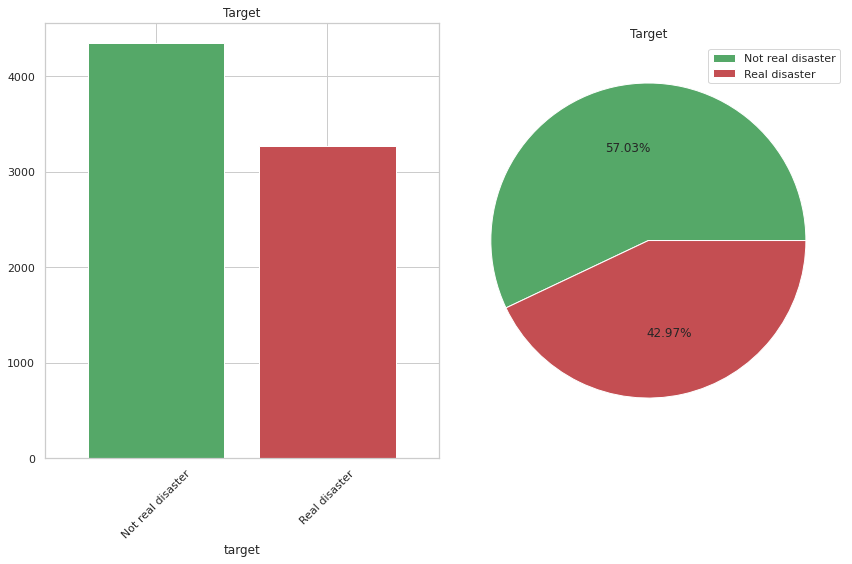

In [6]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

train_df.groupby("target").size().sort_values(ascending=False).plot(
    kind="bar", width=0.8, title="Target", ax=ax1, rot=45, legend=False, color=color)
ax1.set_xticklabels(target_names)

train_df.groupby("target").size().sort_values(ascending=False).plot(
    kind="pie", title="Target", ax=ax2, autopct="%.2f%%", labels=None, colors=color)
ax2.legend(target_names)
ax2.axis("off")

fig.tight_layout()

### Keyword

In [7]:
# Convert column to string
train_df.loc[:, "keyword"] = train_df.keyword.astype("string")
train_df.loc[:, "keyword"] = train_df.keyword.fillna("")

test_df.loc[:, "keyword"] = test_df.keyword.astype("string")
test_df.loc[:, "keyword"] = test_df.keyword.fillna("")

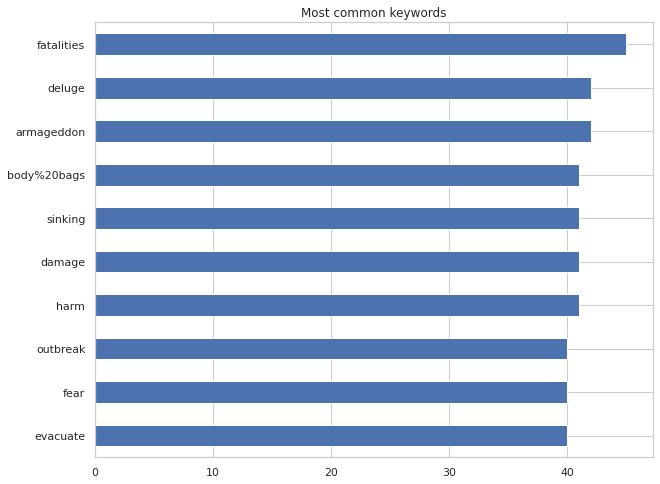

In [8]:
def generate_words_count(words, reversed_sorted=True):
    words_counter = collections.Counter(words)
    common_words_df = pd.DataFrame(words_counter, index=[0]).transpose()
    common_words_df.columns = ["counts"]
    
    if reversed_sorted:
        asc = True
    else:
        asc = False
    return common_words_df.sort_values(by="counts", ascending=asc)


keywords = list(filter(None, train_df.keyword.values))
keywords_df = generate_words_count(keywords)

keywords_df.tail(10).plot(kind="barh", figsize=(10, 8), legend=False, title="Most common keywords")

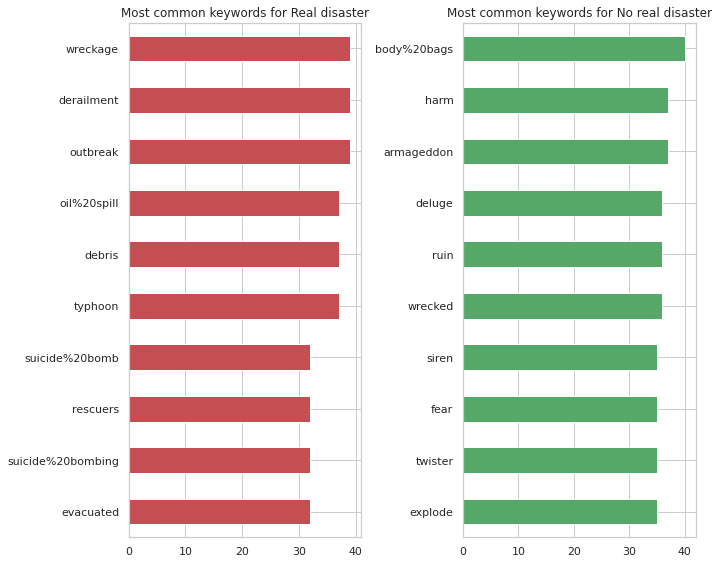

In [9]:
cond_real = train_df.target == real_disaster
real_disaster_keywords = list(filter(None, train_df[cond_real].keyword.values))
no_disaster_keywords = list(filter(None, train_df[~cond_real].keyword.values))

keywords_real_df = generate_words_count(real_disaster_keywords)
keywords_no_df = generate_words_count(no_disaster_keywords)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

keywords_real_df.tail(10).plot(kind="barh", figsize=(10, 8), legend=False, title="Most common keywords for Real disaster", ax=ax1, color="r")
keywords_no_df.tail(10).plot(kind="barh", figsize=(10, 8), legend=False, title="Most common keywords for No real disaster", ax=ax2, color="g")

fig.tight_layout()

In [10]:
train_df.loc[:, "with_keyword"] = train_df.keyword.str.len().astype(bool)
train_df.loc[:, "keyword_len"] = train_df.keyword.str.len()

test_df.loc[:, "with_keyword"] = test_df.keyword.str.len().astype(bool)
test_df.loc[:, "keyword_len"] = test_df.keyword.str.len()

[Text(0, 0, 'Not real disaster'), Text(0, 0, 'Real disaster')]

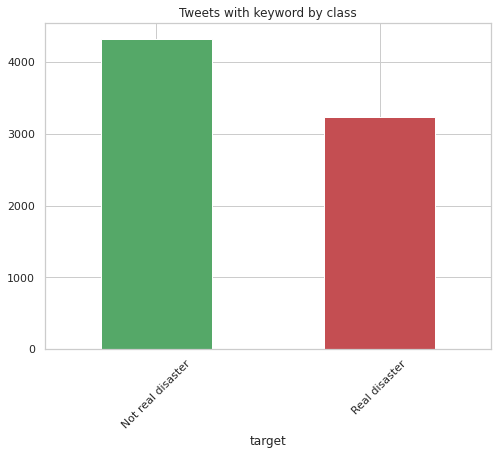

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

train_df.groupby("target")["with_keyword"].sum().plot(kind="bar", ax=ax, rot=45, title="Tweets with keyword by class", color=color)

ax.set_xticklabels(target_names)

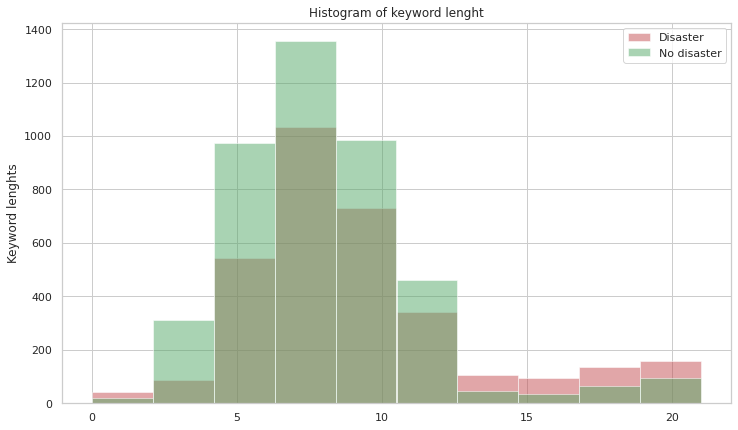

In [12]:
real_keyword_len = train_df[cond_real].keyword_len
no_keyword_len = train_df[~cond_real].keyword_len

fig, ax = plt.subplots(figsize=(12, 7))

kwargs = dict(alpha=0.5, bins=10)
plt.hist(real_keyword_len, **kwargs, color='r', label='Disaster')
plt.hist(no_keyword_len, **kwargs, color='g', label='No disaster')

plt.gca().set(title='Histogram of keyword lenght', ylabel='Keyword lenghts')
plt.legend()

### Location

In [13]:
train_df.loc[:, "location"] = train_df.location.astype("string")
train_df.loc[:, "location"] = train_df.location.fillna("")

test_df.loc[:, "location"] = test_df.location.astype("string")
test_df.loc[:, "location"] = test_df.location.fillna("")

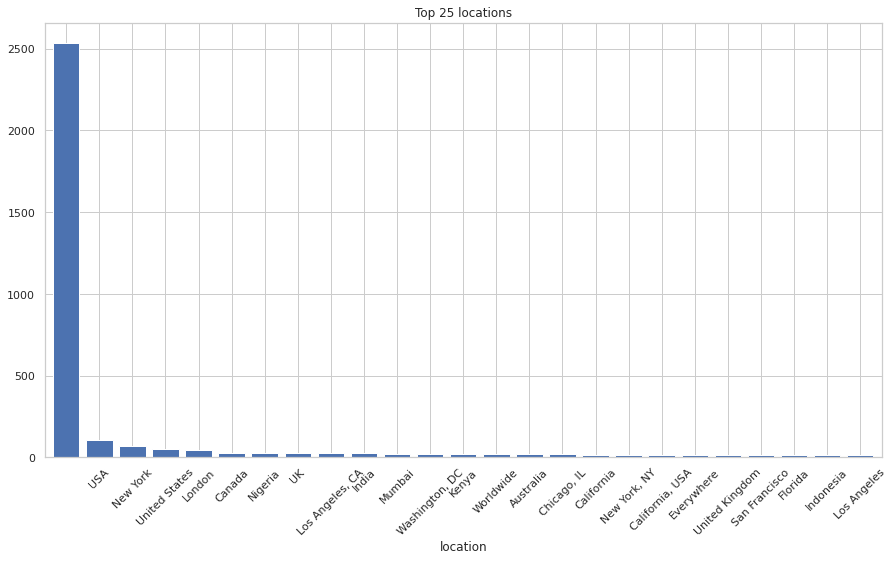

In [14]:
train_df.groupby("location").size().sort_values(ascending=False)[:25].plot(
    kind="bar", figsize=(15, 8), width=0.8, title="Top 25 locations", rot=45)

In [15]:
train_df.loc[:, "with_location"] = train_df.location.str.len().astype(bool)
test_df.loc[:, "with_location"] = test_df.location.str.len().astype(bool)

[Text(0, 0, 'Not real disaster'), Text(0, 0, 'Real disaster')]

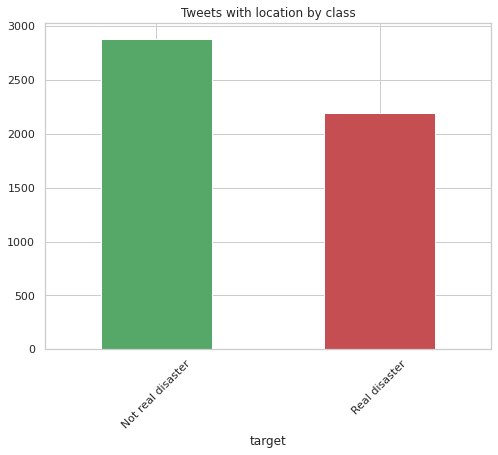

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

train_df.groupby("target")["with_location"].sum().plot(kind="bar", ax=ax, rot=45, title="Tweets with location by class", color=color)

ax.set_xticklabels(target_names)

Create a 3D plot with features "with_location", "with_keyword" and "keyword_len"

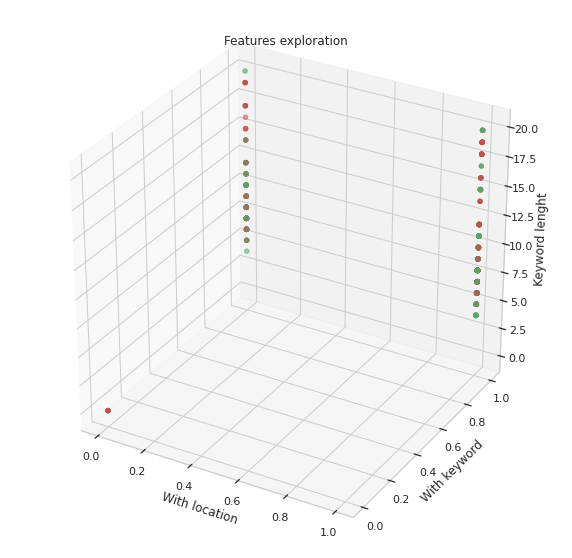

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

sample_train_df = train_df.sample(n=500)

x = sample_train_df.with_location.astype(int).values
y = sample_train_df.with_keyword.astype(int).values
z = sample_train_df.keyword_len.astype(int).values

label_colors = ["g" if t == 0 else "r" for t in sample_train_df.target.values]

ax.scatter(x, y, z, c=label_colors, marker='o')

ax.set_title("Features exploration")
ax.set_xlabel('With location')
ax.set_ylabel('With keyword')
ax.set_zlabel('Keyword lenght')

plt.show()

### Text

Choose randomly 5 tweets for visualize text content

In [18]:
train_df.loc[:, "text"] = train_df.text.astype("string")

test_df.loc[:, "text"] = test_df.text.astype("string")

In [19]:
for tweet, keyword, label in train_df[["text", "keyword", "target"]].sample(n=5).values:
    print(f"{keyword}\n{tweet}\n{target_names[label]}\n")

police
Police walk up on me I be blowin smoke in dey face  wanna lock me up cus I got dope shit is gay
Not real disaster

hijacker
Medieval airplane hijacker testa: earnings the distinction divers: HtaRvrGLY
Real disaster

flames
@TadhgTGMTEL dude was just smoking and the fucking thing went up in flames i though a bomb went off omg scared
Real disaster

disaster
@LovelyLikeLaura I can see why one of your favorite books is 'Beautiful Disaster' it may now be one of mine??
Not real disaster

windstorm
Reality Training: Train falls off elevated tracks during windstorm http://t.co/qzRciNaF5z
Real disaster



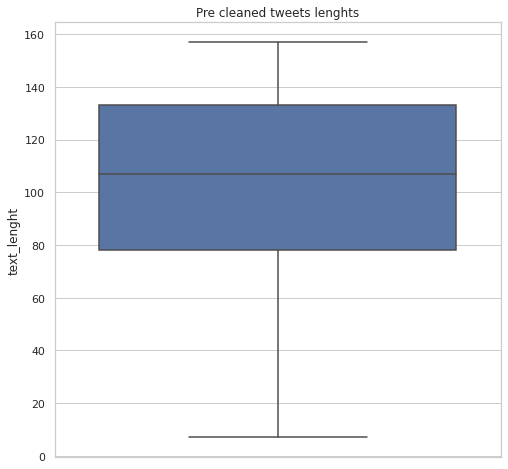

In [20]:
train_df.loc[:, "text_lenght"] = train_df.text.str.len()
test_df.loc[:, "text_lenght"] = test_df.text.str.len()

fig, ax = plt.subplots(figsize=(8, 8))

sns.boxplot(data=train_df, y="text_lenght", ax=ax)
_ = ax.set_title("Pre cleaned tweets lenghts")

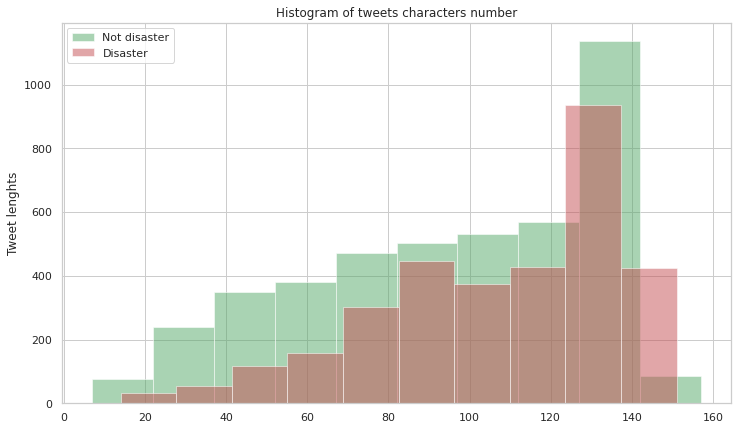

In [21]:
no_disaster_hist = train_df[~cond_real].text_lenght
disaster_hist = train_df[cond_real].text_lenght

fig, ax = plt.subplots(figsize=(12, 7))

kwargs = dict(alpha=0.5, bins=10)
plt.hist(no_disaster_hist, **kwargs, color='g', label='Not disaster')
plt.hist(disaster_hist, **kwargs, color='r', label='Disaster')

plt.gca().set(title='Histogram of tweets characters number', ylabel='Tweet lenghts')
plt.legend()

In [22]:
train_df.loc[:, "splited_text"] = train_df.text.str.split(" ")
train_df.loc[:, "text_words_number"] = train_df.splited_text.apply(lambda x: len(x))

test_df.loc[:, "splited_text"] = test_df.text.str.split(" ")
test_df.loc[:, "text_words_number"] = test_df.splited_text.apply(lambda x: len(x))

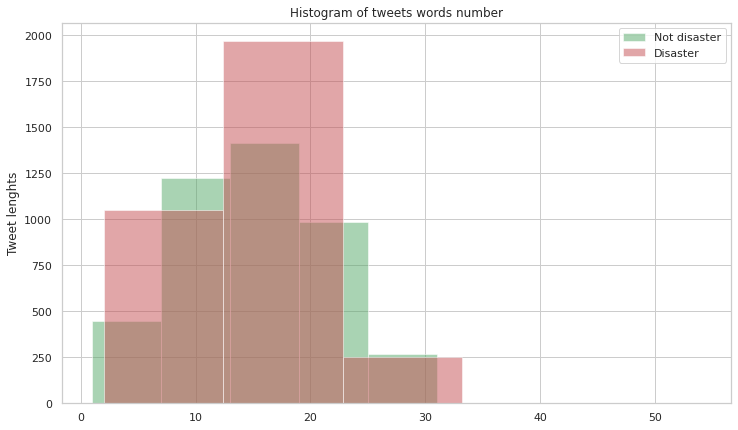

In [23]:
no_disaster_hist = train_df[~cond_real].text_words_number
disaster_hist = train_df[cond_real].text_words_number

fig, ax = plt.subplots(figsize=(12, 7))

kwargs = dict(alpha=0.5, bins=5)
plt.hist(no_disaster_hist, **kwargs, color='g', label='Not disaster')
plt.hist(disaster_hist, **kwargs, color='r', label='Disaster')

plt.gca().set(title='Histogram of tweets words number', ylabel='Tweet lenghts')
plt.legend()

In [24]:
def generate_word_cloud(corpus, title):
    frequences_dict = pd.Series(corpus).value_counts().to_dict()
    wordcloud = WordCloud().generate_from_frequencies(frequences_dict)

    fig = plt.subplots(figsize=(20, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=32)
    plt.show()

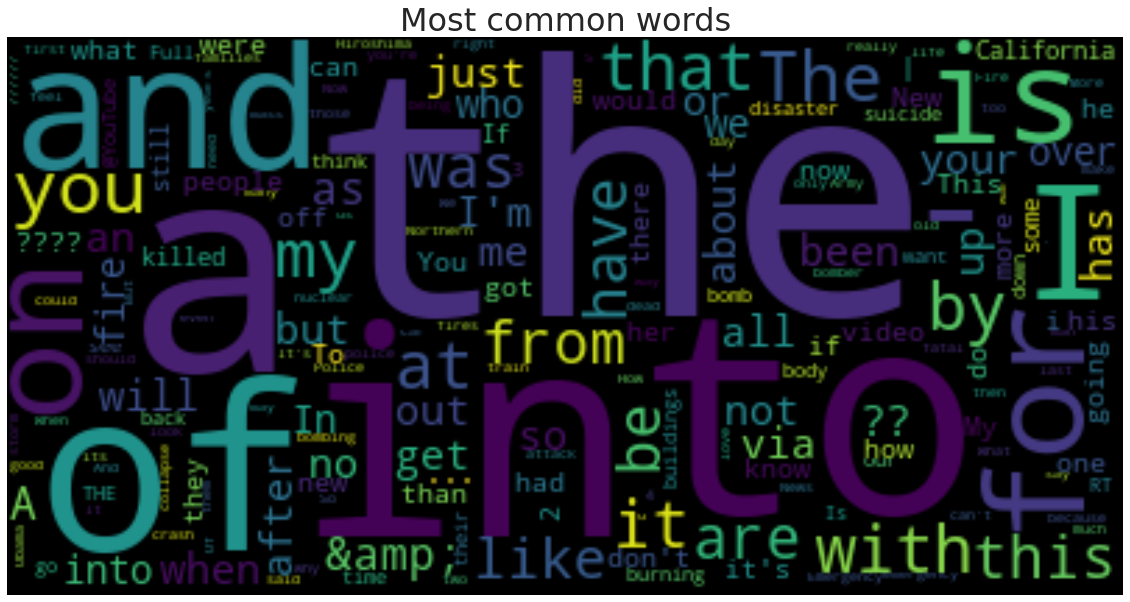

In [25]:
text_corpus = [word for tweet in train_df.splited_text.values for word in tweet]
generate_word_cloud(text_corpus, "Most common words")

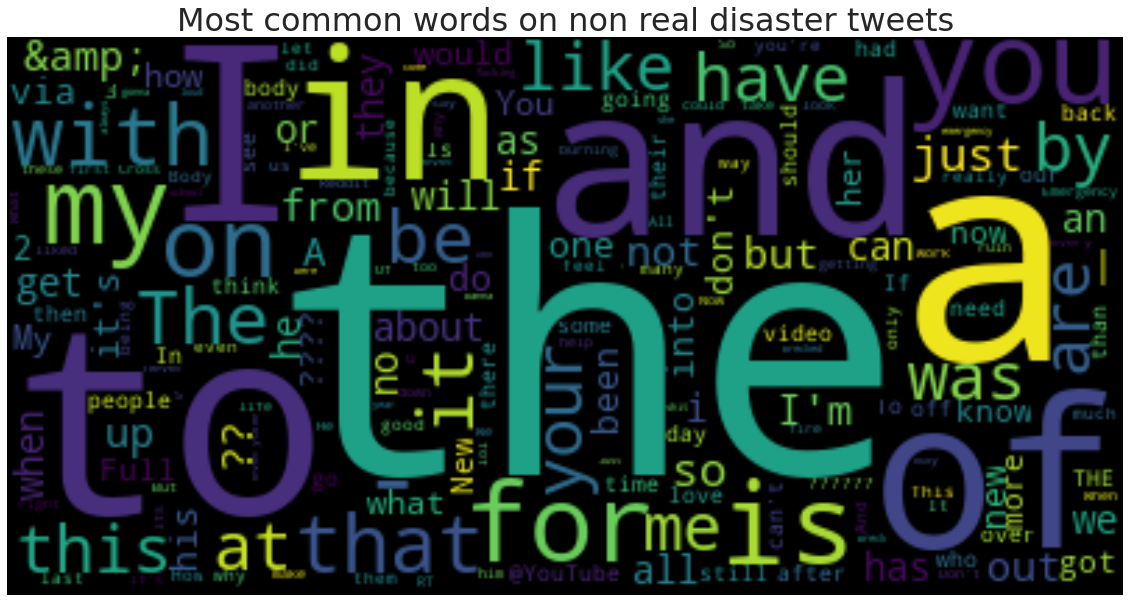

In [26]:
text_corpus = [word for tweet in train_df[~cond_real].splited_text.values for word in tweet]
generate_word_cloud(text_corpus, "Most common words on non real disaster tweets")

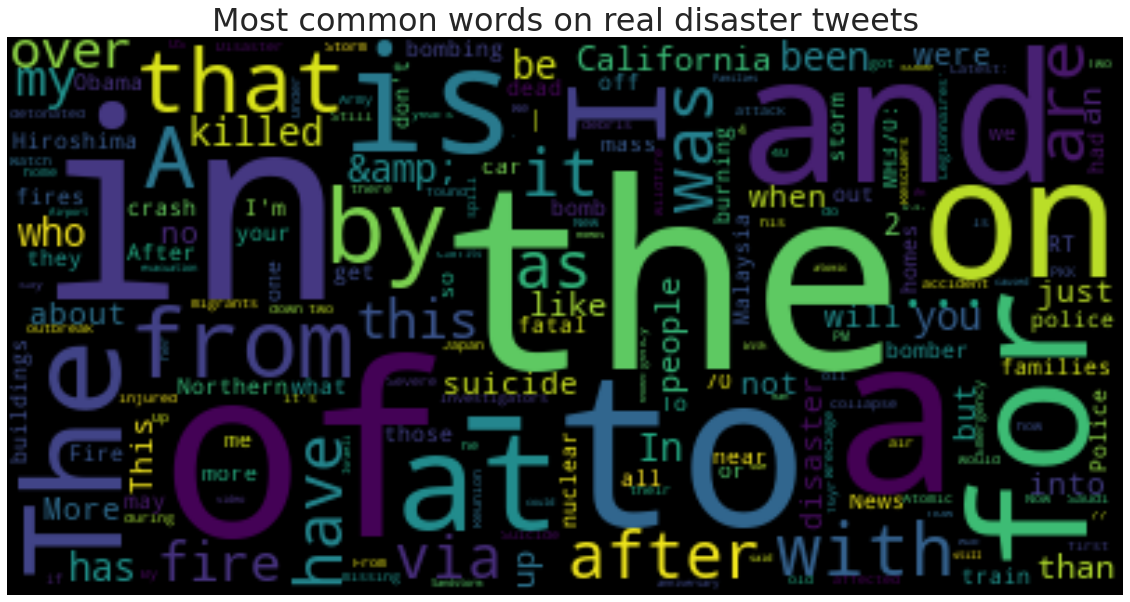

In [27]:
text_corpus = [word for tweet in train_df[cond_real].splited_text.values for word in tweet]
generate_word_cloud(text_corpus, "Most common words on real disaster tweets")

In [28]:
def get_top_text_n_grams(text, n_grams=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=n_grams).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

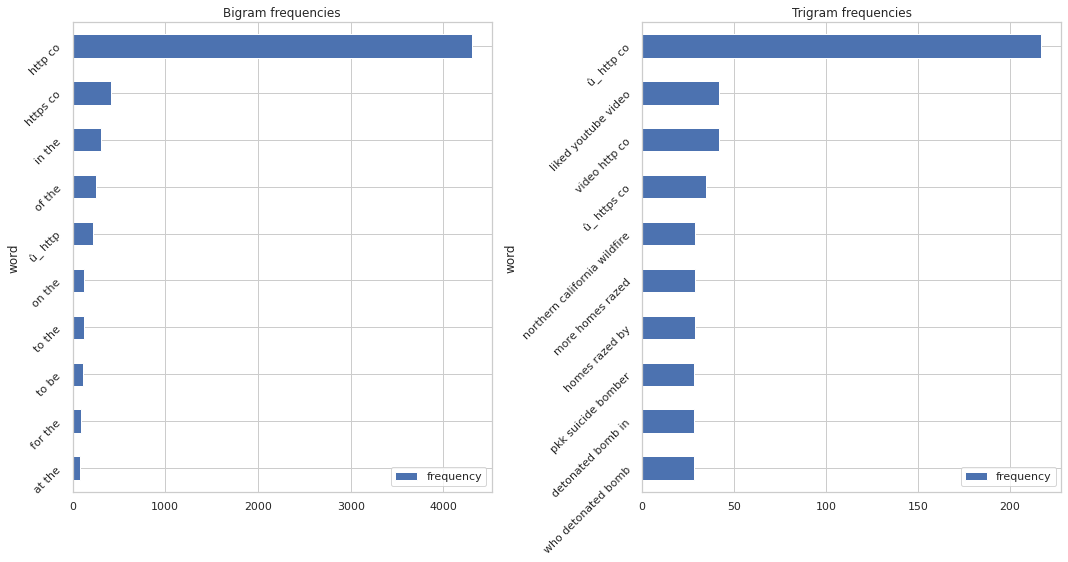

In [29]:
bigrame_df = pd.DataFrame(get_top_text_n_grams(train_df.text), columns=["word", "frequency"])
trigrame_df = pd.DataFrame(get_top_text_n_grams(train_df.text, n_grams=(3, 3)), columns=["word", "frequency"])

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
bigrame_df.sort_values(by="frequency").tail(10).plot(kind="barh", x="word", y="frequency", rot=45, ax=ax1, title="Bigram frequencies")

ax2 = fig.add_subplot(122)
trigrame_df.sort_values(by="frequency").tail(10).plot(kind="barh", x="word", y="frequency", rot=45, ax=ax2, title="Trigram frequencies")

fig.tight_layout()

### Text cleaning

In [30]:
def remove_stop_words(tokens, stop_words=stopwords.words('english')):
    return [token for token in tokens if token not in stop_words]

def clean_html_encoding(text):
    text = BeautifulSoup(text, 'lxml').get_text()
    return text

def remove_html_tags(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_urls(text):
    links_reg = re.compile(r'https?://[A-Za-z0-9./]+')
    return links_reg.sub(r'', text)

def remove_mentions(text):
    mentions_reg = re.compile(r'@[A-Za-z0-9]+')
    return mentions_reg.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_puntuation(tokens):
    return [token for token in tokens if token.isalpha()]

def lower_text(text):
    return text.lower()

def clean_text(text, return_list=True):
    text = clean_html_encoding(text)
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_emoji(text)
    
    text = lower_text(text)
    tokens = tokenize.word_tokenize(text)
    tokens = remove_stop_words(tokens)
    tokens = remove_puntuation(tokens)
    
    ps = porter.PorterStemmer()
    tokens = list(map(ps.stem, tokens))
    
    return " ".join(tokens)

In [31]:
train_df.loc[:, "cleaned_text"] = train_df.text.apply(clean_text)
train_df.loc[:, "cleaned_text_lenght"] = train_df.cleaned_text.str.len()

test_df.loc[:, "cleaned_text"] = test_df.text.apply(clean_text)
test_df.loc[:, "cleaned_text_lenght"] = test_df.cleaned_text.str.len()

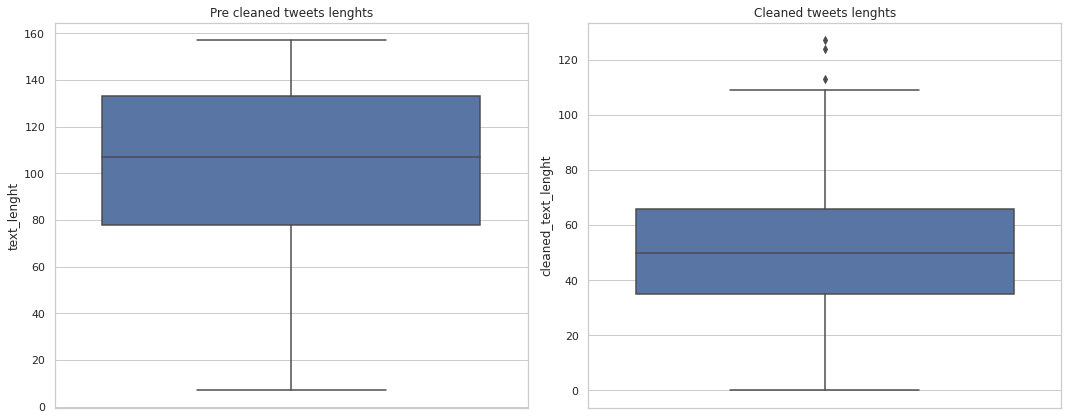

In [32]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
sns.boxplot(data=train_df, y="text_lenght", ax=ax1)
ax1.set_title("Pre cleaned tweets lenghts")

ax2 = fig.add_subplot(122)
sns.boxplot(data=train_df, y="cleaned_text_lenght", ax=ax2)
ax2.set_title("Cleaned tweets lenghts")

fig.tight_layout()

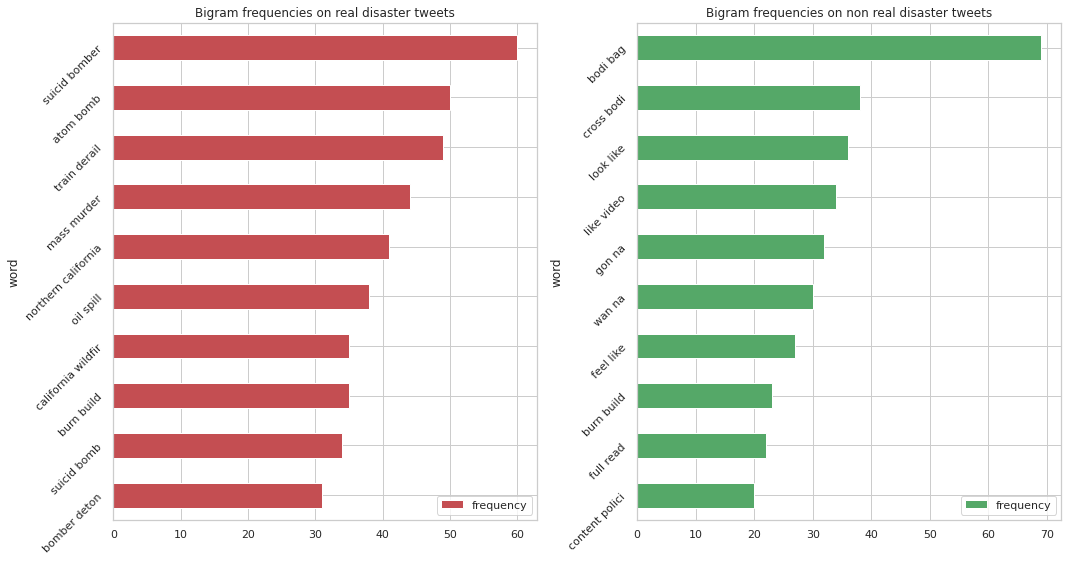

In [33]:
real_bigrame_df = pd.DataFrame(get_top_text_n_grams(train_df[cond_real].cleaned_text), columns=["word", "frequency"])
no_brigam_df = pd.DataFrame(get_top_text_n_grams(train_df[~cond_real].cleaned_text), columns=["word", "frequency"])

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
real_bigrame_df.sort_values(by="frequency").tail(10).plot(kind="barh", x="word", y="frequency", rot=45, ax=ax1, 
                                                          title="Bigram frequencies on real disaster tweets", color="r")

ax2 = fig.add_subplot(122)
no_brigam_df.sort_values(by="frequency").tail(10).plot(kind="barh", x="word", y="frequency", rot=45, ax=ax2, 
                                                       title="Bigram frequencies on non real disaster tweets", color="g")

fig.tight_layout()

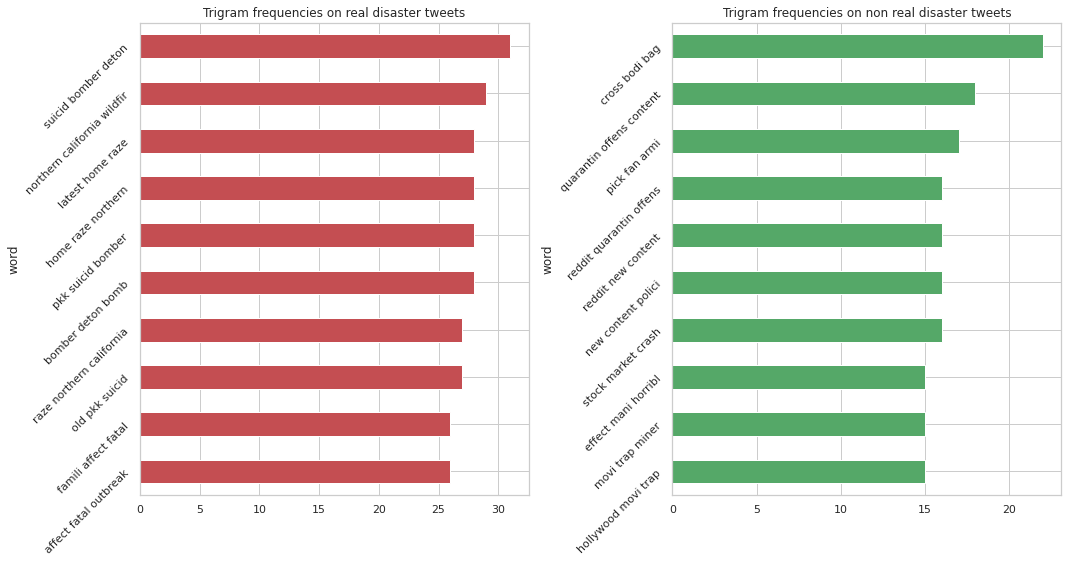

In [34]:
real_trigrame_df = pd.DataFrame(get_top_text_n_grams(train_df[cond_real].cleaned_text, n_grams=(3, 3)), columns=["word", "frequency"])
no_trigam_df = pd.DataFrame(get_top_text_n_grams(train_df[~cond_real].cleaned_text, n_grams=(3, 3)), columns=["word", "frequency"])

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
real_trigrame_df.sort_values(by="frequency").tail(10).plot(kind="barh", x="word", y="frequency", rot=45, ax=ax1, legend=False, 
                                                          title="Trigram frequencies on real disaster tweets", color="r")

ax2 = fig.add_subplot(122)
no_trigam_df.sort_values(by="frequency").tail(10).plot(kind="barh", x="word", y="frequency", rot=45, ax=ax2, legend=False, 
                                                       title="Trigram frequencies on non real disaster tweets", color="g")

fig.tight_layout()

In [35]:
train_df.loc[:, "mentions"] = train_df.text.str.findall(r'@[A-Za-z0-9]+')
train_df.loc[:, "mentions_number"] = train_df.mentions.apply(len)

test_df.loc[:, "mentions"] = test_df.text.str.findall(r'@[A-Za-z0-9]+')
test_df.loc[:, "mentions_number"] = test_df.mentions.apply(len)

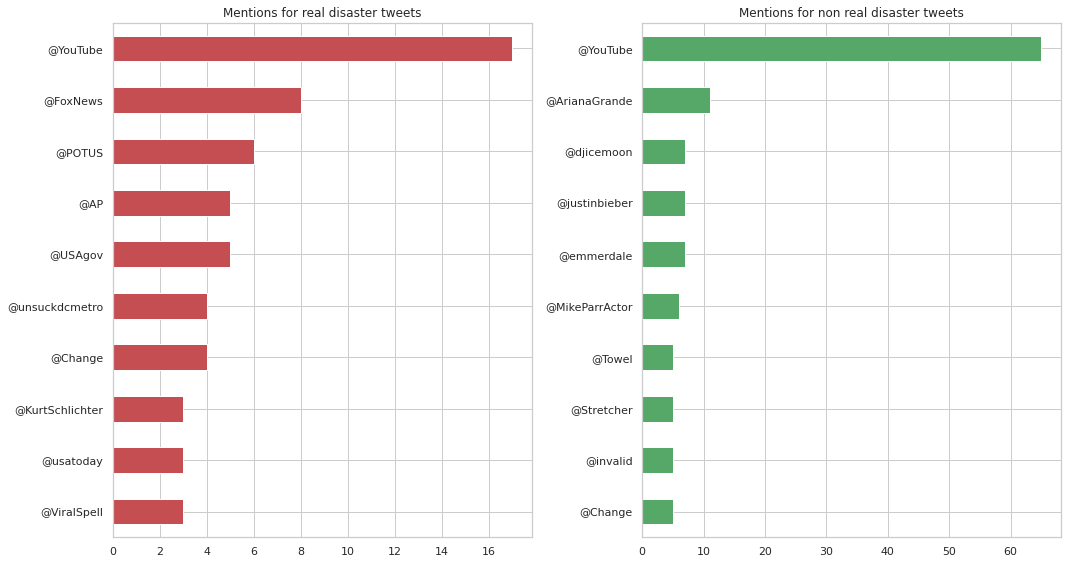

In [36]:
real_mentions = pd.Series([mention for tweet in train_df[cond_real].mentions.values for mention in tweet]).value_counts(ascending=True)
no_real_mentions = pd.Series([mention for tweet in train_df[~cond_real].mentions.values for mention in tweet]).value_counts(ascending=True)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
real_mentions.tail(10).plot(kind="barh", ax=ax1, title="Mentions for real disaster tweets", color="r")

ax1 = fig.add_subplot(122)
no_real_mentions.tail(10).plot(kind="barh", ax=ax1, title="Mentions for non real disaster tweets", color="g")

fig.tight_layout()

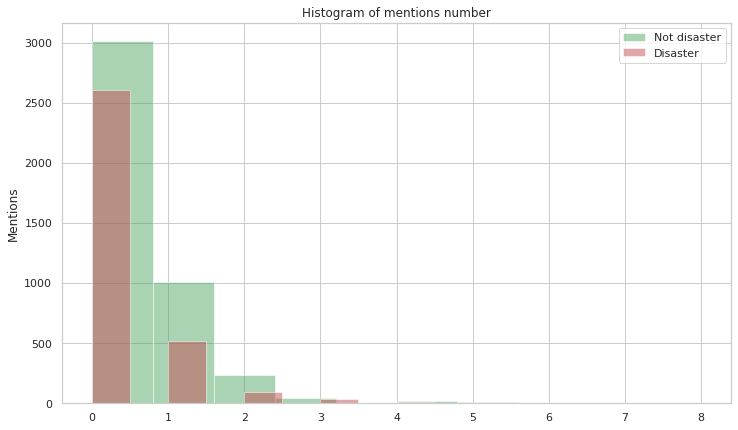

In [37]:
no_disaster_hist = train_df[~cond_real].mentions_number
disaster_hist = train_df[cond_real].mentions_number

fig, ax = plt.subplots(figsize=(12, 7))

kwargs = dict(alpha=0.5, bins=10)
plt.hist(no_disaster_hist, **kwargs, color='g', label='Not disaster')
plt.hist(disaster_hist, **kwargs, color='r', label='Disaster')

plt.gca().set(title='Histogram of mentions number', ylabel='Mentions')
plt.legend()

In [38]:
train_df.loc[:, "hashtags"] = train_df.text.str.findall(r'#[A-Za-z0-9]+')
train_df.loc[:, "hashtags_number"] = train_df.hashtags.apply(len)

test_df.loc[:, "hashtags"] = test_df.text.str.findall(r'#[A-Za-z0-9]+')
test_df.loc[:, "hashtags_number"] = test_df.hashtags.apply(len)

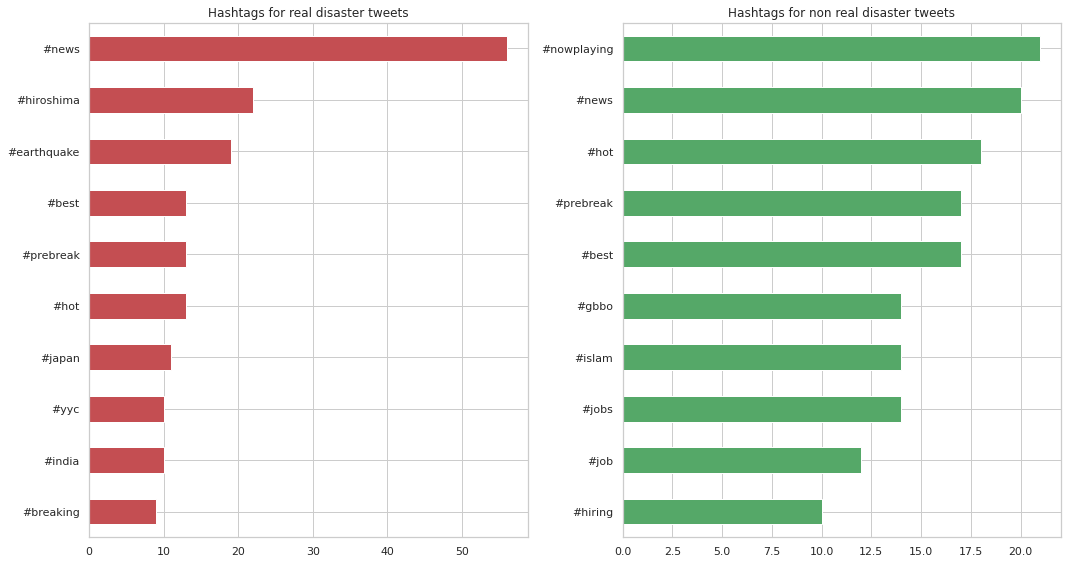

In [39]:
real_hashtags = pd.Series([hashtag.lower() for tweet in train_df[cond_real].hashtags.values for hashtag in tweet]).value_counts(ascending=True)
no_real_hashtags = pd.Series([hashtag.lower() for tweet in train_df[~cond_real].hashtags.values for hashtag in tweet]).value_counts(ascending=True)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
real_hashtags.tail(10).plot(kind="barh", ax=ax1, title="Hashtags for real disaster tweets", color="r")

ax1 = fig.add_subplot(122)
no_real_hashtags.tail(10).plot(kind="barh", ax=ax1, title="Hashtags for non real disaster tweets", color="g")

fig.tight_layout()

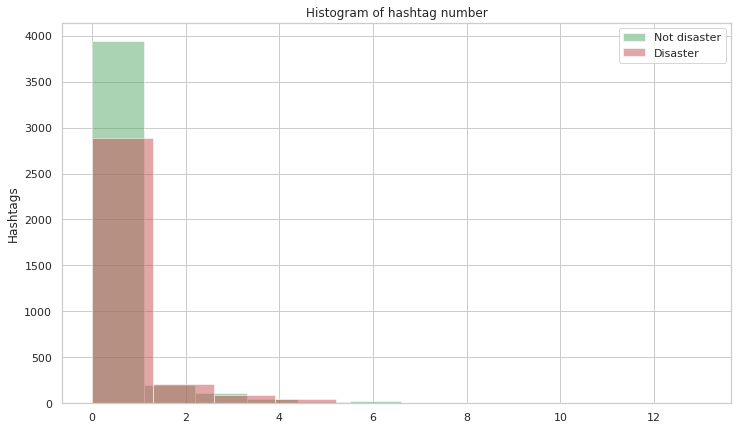

In [40]:
no_disaster_hist = train_df[~cond_real].hashtags_number
disaster_hist = train_df[cond_real].hashtags_number

fig, ax = plt.subplots(figsize=(12, 7))

kwargs = dict(alpha=0.5, bins=10)
plt.hist(no_disaster_hist, **kwargs, color='g', label='Not disaster')
plt.hist(disaster_hist, **kwargs, color='r', label='Disaster')

plt.gca().set(title='Histogram of hashtag number', ylabel='Hashtags')
plt.legend()

### Feature selection

In [41]:
def clean_text(text, remove_stop_words=True):
    text = clean_html_encoding(text)
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_emoji(text)
    
    text = lower_text(text)
    tokens = tokenize.word_tokenize(text)
    if remove_stop_words:
        tokens = remove_stop_words(tokens)
    tokens = remove_puntuation(tokens)
    
    ps = porter.PorterStemmer()
    tokens = list(map(ps.stem, tokens))
    
    return " ".join(tokens)

Text(0.5, 1.0, 'HeadMap of features correlations')

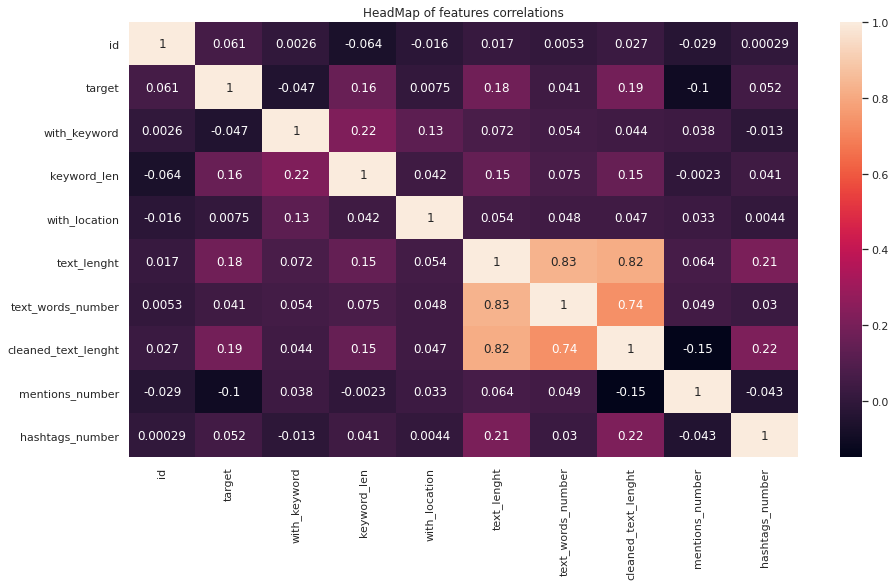

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, ax=ax)

ax.set_title("HeadMap of features correlations")

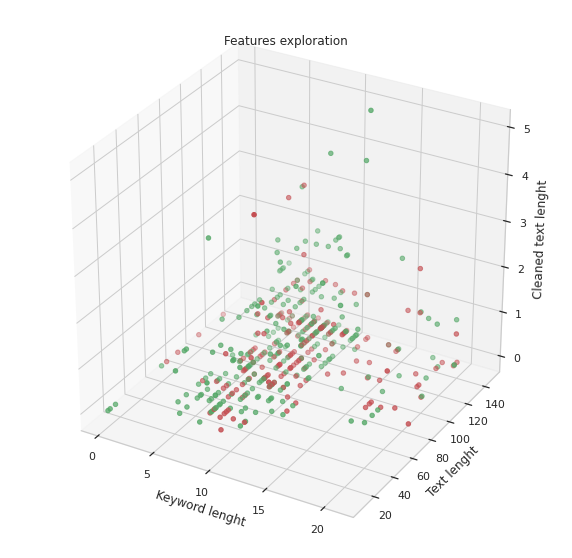

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

sample_train_df = train_df.sample(n=500)

x = sample_train_df.keyword_len.astype(int).values
y = sample_train_df.text_lenght.astype(int).values
z = sample_train_df.cleaned_text_lenght.astype(int).values

label_colors = ["g" if t == 0 else "r" for t in sample_train_df.target.values]

ax.scatter(x, y, z, c=label_colors, marker='o')

ax.set_title("Features exploration")
ax.set_xlabel('Keyword lenght')
ax.set_ylabel('Text lenght')
ax.set_zlabel('Cleaned text lenght')

plt.show()

### Model validation

In [44]:
def create_pipeline_two_features(clf):
    # Prepreocessing features
    vectorizer_pipe = Pipeline([
        ("text_bow", CountVectorizer()),
        ("vec", TfidfTransformer())
    ])

    numeric_normalitzation = Pipeline([
        ("norm", MinMaxScaler())
    ])

    # Join features and classify
    full_pipeline = Pipeline([
        ('union', ColumnTransformer([
            ("vectorizer", vectorizer_pipe, "cleaned_text"),
            ("numeric_norm", numeric_normalitzation, ["cleaned_text_lenght"])
        ])),
        ("clf", clf)
    ])
    
    return full_pipeline


def create_pipeline_only_text_feature(clf):
    full_pipeline = Pipeline([
        ("text_bow", CountVectorizer()),
        ("vec", TfidfTransformer()),
        ("clf", clf)
    ])
    
    return full_pipeline


def create_grid_search(model, params, cv, x_train, y_train, x_test, y_test, target_names):
    grid_clf = GridSearchCV(model, params, cv=cv)
    grid_clf.fit(x_train, y_train)
    
    y_pred = grid_clf.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    print(classification_report(y_pred, y_test, target_names=target_names))
    print(f"Confusion matrix:\n{confusion_matrix(y_pred, y_test)}")
    print(f"\nAccuracy: {accuracy}")
    print("-"*20)
    print(grid_clf.best_params_)


def train_and_predict_pipeline(pipeline, x_train, y_train, x_test, y_test, target_names):
    print("\nTraining model ...")
    
    start = timeit.default_timer()
    pipeline.fit(x_train, y_train)
    stop = timeit.default_timer()
    
    training_time = stop - start
    print(f"Done!\nTraining time: {training_time}\nMaking predictions...")
    
    y_pred = pipeline.predict(x_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    
    print(classification_report(y_pred, y_test, target_names=target_names))
    print(f"Confusion matrix:\n{confusion_matrix(y_pred, y_test)}")
    print(f"\nAccuracy: {accuracy}")
    print("-"*20)
    
    return training_time, accuracy


### Grid Search for find best model parameters

In [45]:
models = [("Naivy Bayes", MultinomialNB()), 
          ("Logisitc Regression", LogisticRegression()), 
          ("SVM", SVC()), 
          ("Random Forest", RandomForestClassifier())]

#### Params

In [46]:
params_naivy_bayes = {
    'clf__alpha': [0, 0.5, 1, 2, 5, 10]
}

param_logistic_regression = {
    'clf__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

param_svm = [
    {'clf__kernel': ['rbf'], 'clf__gamma': [1e-3, 1e-4, "scale", "auto"], 'clf__C': [0.01, 0.1, 0.5, 1, 10, 100, 1000]},
    {'clf__kernel': ['linear'], 'clf__C': [0.01, 0.1, 0.5, 1, 10, 100, 1000]},
    {'clf__kernel': ['sigmoid'], 'clf__C': [0.01, 0.1, 0.5, 1, 10, 100, 1000], 'clf__gamma': [1e-3, 1e-4, "scale", "auto"]}
]

params_random_forest = {
    'clf__max_depth': [3, 5, 10, None],
    'clf__max_features': ['auto', 'sqrt'],
    'clf__min_samples_leaf': [2, 4],
    'clf__min_samples_split': [2, 5],
    'clf__n_estimators': [25, 50, 75, 100, 150]
}

all_params = [params_naivy_bayes, param_logistic_regression, param_svm, params_random_forest]

### First experiment: Only Vectorizer features

In [47]:
def balanced_train_test_split(input_df_class_one, input_df_class_two, features_columns=None, target_column_name="target", test_size=None):
    samples_class_one = input_df_class_one.shape[0]
    samples_class_two = input_df_class_two.shape[0]
    
    max_class_samples = samples_class_one if samples_class_one <= samples_class_two else samples_class_two
    
    test_size = int(np.ceil(max_class_samples * test_size))
    train_size = max_class_samples - test_size
        
    test_class_one_df = input_df_class_one.sample(n=test_size)
    test_class_two_df = input_df_class_two.sample(n=test_size)
        
    # Concat the same sampels by class for test
    test_concat = [test_class_one_df, test_class_two_df]
    test_df = pd.concat(test_concat, ignore_index=True)
    # Shuffle dataframe
    test_df = test_df.sample(frac=1).reset_index(drop=True)
    
    # Concat the same sampels by class for training (different from test)
    train_concat = [input_df_class_one[~input_df_class_one.index.isin(test_class_one_df.index)].sample(n=train_size), 
                    input_df_class_two[~input_df_class_two.index.isin(test_class_two_df.index)].sample(n=train_size)]
    train_df = pd.concat(train_concat, ignore_index=True)
    # Shuffle dataframe
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    
    if not features_columns:
        features_columns = [col for col in input_df_class_one.columns if col != target_column_name] 
    return train_df[features_columns], test_df[features_columns], train_df[target_column_name], test_df[target_column_name]

In [48]:
x_train, x_test, y_train, y_test = balanced_train_test_split(train_df.loc[cond_real], train_df.loc[~cond_real], test_size=0.50)
                                                             
print(f"Train size: {x_train.shape} ({y_train.value_counts()[0]} - {y_train.value_counts()[0]})")
print(f"Test size: {x_test.shape} ({y_test.value_counts()[0]} - {y_test.value_counts()[0]})")
for model, model_params in zip(models, all_params):
    title, clf = model
    print(f"\nStarting GridSearch for model {title}")
    pipe = create_pipeline_only_text_feature(clf)
    print(model_params)
    create_grid_search(pipe, model_params, 5, x_train["cleaned_text"], y_train, x_test["cleaned_text"], y_test, target_names)

Train size: (3270, 16) (1635 - 1635)
Test size: (3272, 16) (1636 - 1636)

Starting GridSearch for model Naivy Bayes
{'clf__alpha': [0, 0.5, 1, 2, 5, 10]}


/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


                   precision    recall  f1-score   support

Not real disaster       0.79      0.77      0.78      1671
    Real disaster       0.76      0.78      0.77      1601

         accuracy                           0.78      3272
        macro avg       0.78      0.78      0.78      3272
     weighted avg       0.78      0.78      0.78      3272

Confusion matrix:
[[1286  385]
 [ 350 1251]]

Accuracy: 0.7753667481662592
--------------------
{'clf__alpha': 1}

Starting GridSearch for model Logisitc Regression
{'clf__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5], 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
                   precision    recall  f1-score   support

Not real disaster       0.81      0.77      0.79      1726
    Real disaster       0.76      0.80      0.78      1546

         accuracy                           0.79      3272
        macro avg       0.79      0.79      0.79      3272
     weighted avg       0.79      0.79      0.79      327

#### Train with best parameters

In [49]:
x_train, x_test, y_train, y_test = balanced_train_test_split(train_df.loc[cond_real], train_df.loc[~cond_real], test_size=0.15)

In [51]:
models_best_params  = [
    ("Naivy Bayes", MultinomialNB(alpha=1)), 
    ("Logisitc Regression", LogisticRegression(C=0.5, solver='newton-cg')), 
    ("SVM", SVC(C=0.5, gamma='scale', kernel='sigmoid')), 
    ("Random Forest", RandomForestClassifier(n_estimators=150, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5))
]

results_ex1 = []
for model in models_best_params:
    title, clf = model
    print(f"{title}")
    pipe = create_pipeline_only_text_feature(clf)
    training_time, accuracy = train_and_predict_pipeline(pipe, x_train["cleaned_text"], y_train, x_test["cleaned_text"], y_test, target_names)
    
    results_ex1.append({"model": title, "time": training_time, "accuracy": accuracy})

Naivy Bayes

Training model ...
Done!
Training time: 0.1396845849994861
Making predictions...
                   precision    recall  f1-score   support

Not real disaster       0.79      0.76      0.77       508
    Real disaster       0.75      0.78      0.76       474

         accuracy                           0.77       982
        macro avg       0.77      0.77      0.77       982
     weighted avg       0.77      0.77      0.77       982

Confusion matrix:
[[386 122]
 [105 369]]

Accuracy: 0.7688391038696538
--------------------
Logisitc Regression

Training model ...
Done!
Training time: 0.22132803800195688
Making predictions...
                   precision    recall  f1-score   support

Not real disaster       0.81      0.76      0.78       520
    Real disaster       0.75      0.79      0.77       462

         accuracy                           0.78       982
        macro avg       0.78      0.78      0.78       982
     weighted avg       0.78      0.78      0.78       98

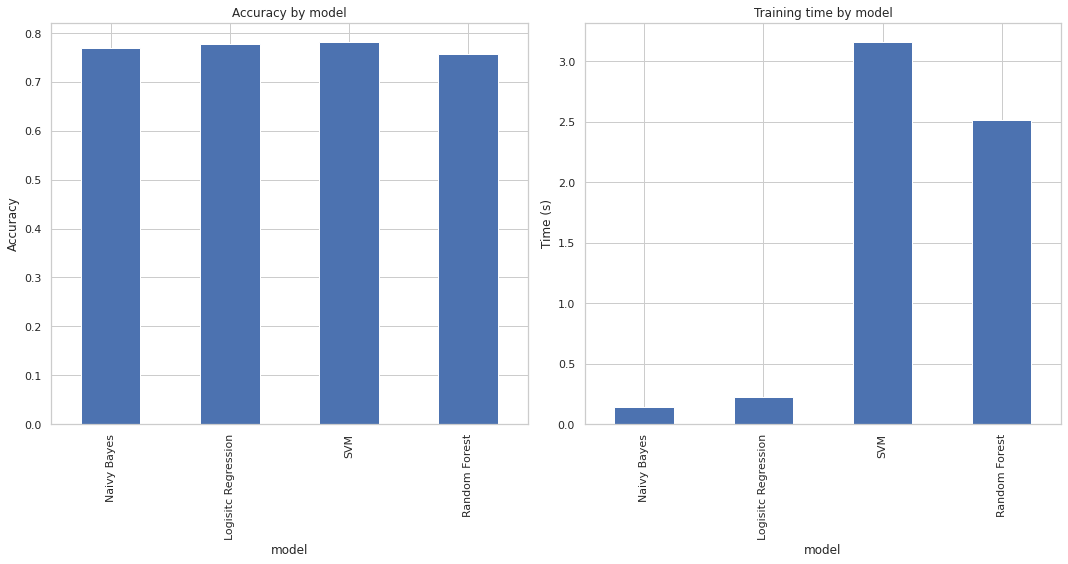

In [52]:
results_ex1_df = pd.DataFrame(results_ex1)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
results_ex1_df.plot(kind="bar", x="model", y="accuracy", title="Accuracy by model", ax=ax1, legend=False, rot=45)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("")

ax2 = fig.add_subplot(122)
results_ex1_df.plot(kind="bar", x="model", y="time", title="Training time by model", ax=ax2, legend=False, rot=45)
ax2.set_ylabel("Time (s)")
ax2.set_xlabel("")

fig.tight_layout()

### Second experiment: Vectorizer features + text_lenght

In [53]:
x_train, x_test, y_train, y_test = balanced_train_test_split(train_df.loc[cond_real], train_df.loc[~cond_real], test_size=0.50)

for model, model_params in zip(models, all_params):
    title, clf = model
    print(f"\nStarting GridSearch for model {title}")
    pipe = create_pipeline_two_features(clf)
    print(model_params)
    create_grid_search(pipe, model_params, 5, x_train, y_train, x_test, y_test, target_names)


Starting GridSearch for model Naivy Bayes
{'clf__alpha': [0, 0.5, 1, 2, 5, 10]}


/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


                   precision    recall  f1-score   support

Not real disaster       0.33      0.76      0.45       704
    Real disaster       0.89      0.57      0.70      2568

         accuracy                           0.61      3272
        macro avg       0.61      0.66      0.58      3272
     weighted avg       0.77      0.61      0.64      3272

Confusion matrix:
[[ 532  172]
 [1104 1464]]

Accuracy: 0.6100244498777506
--------------------
{'clf__alpha': 1}

Starting GridSearch for model Logisitc Regression
{'clf__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5], 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

                   precision    recall  f1-score   support

Not real disaster       0.72      0.69      0.70      1718
    Real disaster       0.67      0.71      0.69      1554

         accuracy                           0.70      3272
        macro avg       0.70      0.70      0.70      3272
     weighted avg       0.70      0.70      0.70      3272

Confusion matrix:
[[1181  537]
 [ 455 1099]]

Accuracy: 0.6968215158924206
--------------------
{'clf__C': 3.5, 'clf__solver': 'newton-cg'}

Starting GridSearch for model SVM
[{'clf__kernel': ['rbf'], 'clf__gamma': [0.001, 0.0001, 'scale', 'auto'], 'clf__C': [0.01, 0.1, 0.5, 1, 10, 100, 1000]}, {'clf__kernel': ['linear'], 'clf__C': [0.01, 0.1, 0.5, 1, 10, 100, 1000]}, {'clf__kernel': ['sigmoid'], 'clf__C': [0.01, 0.1, 0.5, 1, 10, 100, 1000], 'clf__gamma': [0.001, 0.0001, 'scale', 'auto']}]
                   precision    recall  f1-score   support

Not real disaster       0.78      0.68      0.72      1869
    Real disaster       0.63 

#### Train with best parameters

In [54]:
x_train, x_test, y_train, y_test = balanced_train_test_split(train_df.loc[cond_real], train_df.loc[~cond_real], test_size=0.15)

In [56]:
models_best_params  = [
    ("Naivy Bayes", MultinomialNB(alpha=1)), 
    ("Logisitc Regression", LogisticRegression(C=3.5, solver='newton-cg')), 
    ("SVM", SVC(C=1000, gamma=0.001, kernel='rbf')), 
    ("Random Forest", RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=75))
]

results_ex2 = []
for model in models_best_params:
    title, clf = model
    print(f"{title}")
    pipe = create_pipeline_two_features(clf)
    training_time, accuracy = train_and_predict_pipeline(pipe, x_train, y_train, x_test, y_test, target_names)
    
    results_ex2.append({"model": title, "time": training_time, "accuracy": accuracy})

Naivy Bayes

Training model ...
Done!
Training time: 0.2733928570014541
Making predictions...
                   precision    recall  f1-score   support

Not real disaster       0.37      0.76      0.50       239
    Real disaster       0.88      0.58      0.70       743

         accuracy                           0.63       982
        macro avg       0.63      0.67      0.60       982
     weighted avg       0.76      0.63      0.65       982

Confusion matrix:
[[182  57]
 [309 434]]

Accuracy: 0.6272912423625254
--------------------
Logisitc Regression

Training model ...
Done!
Training time: 0.41253641599905677
Making predictions...
                   precision    recall  f1-score   support

Not real disaster       0.76      0.69      0.72       539
    Real disaster       0.66      0.73      0.70       443

         accuracy                           0.71       982
        macro avg       0.71      0.71      0.71       982
     weighted avg       0.72      0.71      0.71       98

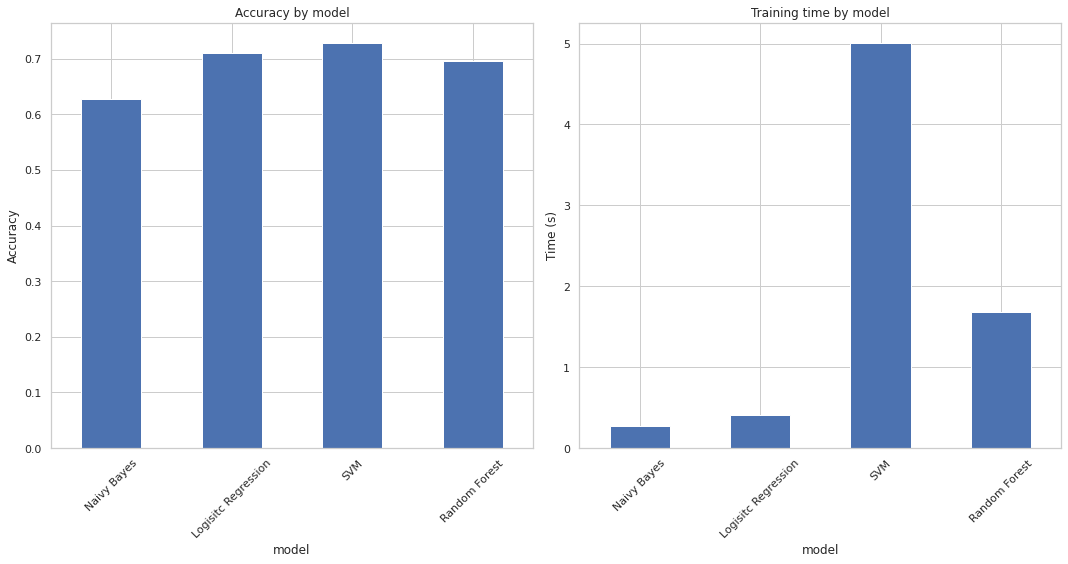

In [58]:
results_ex2_df = pd.DataFrame(results_ex2)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
results_ex2_df.plot(kind="bar", x="model", y="accuracy", title="Accuracy by model", ax=ax1, legend=False, rot=45)
ax1.set_ylabel("Accuracy")

ax2 = fig.add_subplot(122)
results_ex2_df.plot(kind="bar", x="model", y="time", title="Training time by model", ax=ax2, legend=False, rot=45)
ax2.set_ylabel("Time (s)")

fig.tight_layout()

### Experiment 1 vs Experiment 2

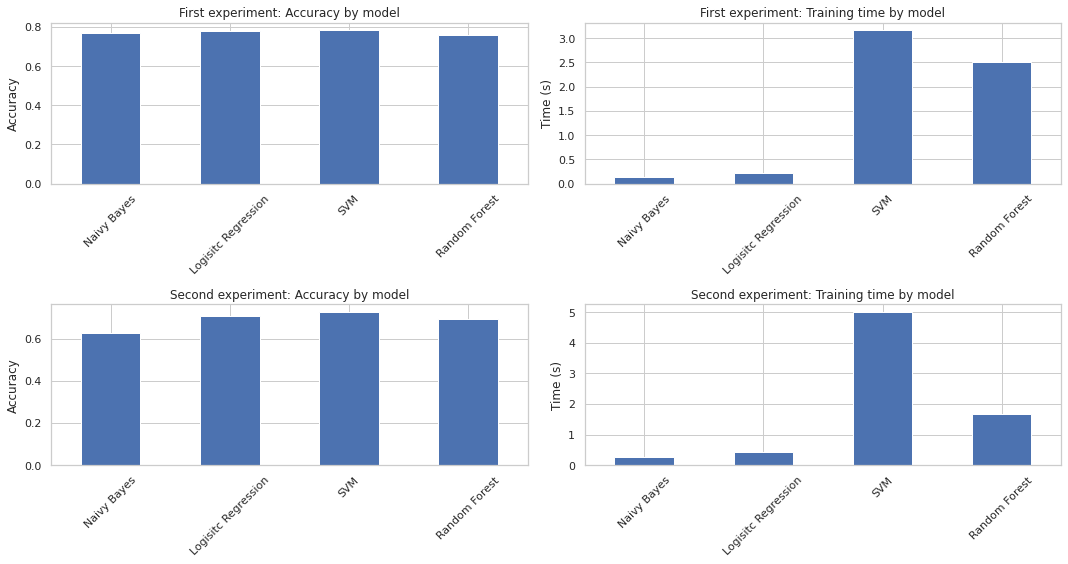

In [60]:
fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(221)
results_ex1_df.plot(kind="bar", x="model", y="accuracy", title="First experiment: Accuracy by model", ax=ax1, legend=False, rot=45)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("")

ax2 = fig.add_subplot(222)
results_ex1_df.plot(kind="bar", x="model", y="time", title="First experiment: Training time by model", ax=ax2, legend=False, rot=45)
ax2.set_ylabel("Time (s)")
ax2.set_xlabel("")

ax3 = fig.add_subplot(223)
results_ex2_df.plot(kind="bar", x="model", y="accuracy", title="Second experiment: Accuracy by model", ax=ax3, legend=False, rot=45)
ax3.set_ylabel("Accuracy")
ax3.set_xlabel("")

ax4 = fig.add_subplot(224)
results_ex2_df.plot(kind="bar", x="model", y="time", title="Second experiment: Training time by model", ax=ax4, legend=False, rot=45)
ax4.set_ylabel("Time (s)")
ax4.set_xlabel("")

fig.tight_layout()

### Create submission file

In [ ]:
def create_submission_file(predictions, ids, path, filename="submission.csv"):
    submission_data = {
        "id": ids,
        "target": predictions
    }

    submission_df = pd.DataFrame(submission_data)
    submission_df.to_csv(os.path.join(path, filename), index=False)
    
    print("Good luck!")

In [ ]:
create_submission_file(y_pred, test_df.id, output_path)